In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

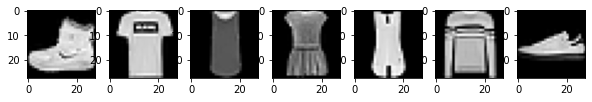

In [98]:
n = 7
fig, ax = plt.subplots(1,n, figsize=(10,10))
for i in range(n):
    ax[i].imshow(x_train[i], cmap='gray')

In [4]:
# Data Normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((28,28)),
    tf.keras.layers.Reshape((28,28,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=1),
    tf.keras.layers.Conv2D(filters=28, kernel_size=(3,3), activation='relu', strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=1),
    tf.keras.layers.Conv2D(filters=14, kernel_size=(3,3), activation='relu', strides=1),
    tf.keras.layers.Conv2D(filters=14, kernel_size=(3,3), activation='relu', strides=1),
    tf.keras.layers.Conv2D(filters=14, kernel_size=(3,3), activation='relu', strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 23, 23, 28)        16156     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 28)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 14)        3542      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 18, 18, 14)       

In [9]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy']
)

In [10]:
model.fit(x=x_train, y=y_train, epochs=1, batch_size=64)

938/938 [==============================] - 106s 112ms/step - loss: 0.7273 - accuracy: 0.7367


In [11]:
model.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.3828 - accuracy: 0.8604


[0.3827992379665375, 0.8604000210762024]

### Visualise filters

In [87]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[7].get_weights()
filters.shape

(3, 3, 14, 14)

In [88]:
# Normalize filters
filters = (filters - filters.mean())/(filters.mean())

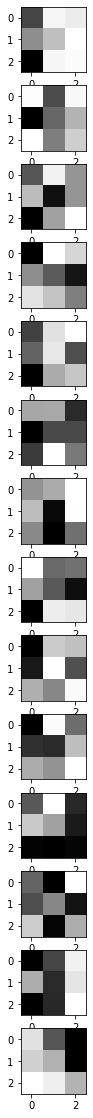

In [90]:
# Single channel filters
kernel_num = int(filters.shape[3])
kernel_size = int(np.sqrt(int(filters.size)/kernel_num))

fig, ax = plt.subplots(kernel_num, 1, figsize=(20,20))

for i in range(kernel_num):
    filter = filters[:,:,:,i]
    ax[i].imshow(filter[:, :, 0], cmap='gray')